# <strong><center> Start-Up Evaluation and Investment Prediction </center></strong>


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from google_drive_downloader import GoogleDriveDownloader as gdd

# Predictions import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

###### You can change the destination path to your favored path on your local machine 

In [3]:
gdd.download_file_from_google_drive(file_id='1VxKYI4n0a0WPtklQuGux2dyGucf31XDZ',
                                    dest_path='./data/investments_vc.csv',
                                    unzip=True)

Unzipping...

In [4]:
destination_path = './data/investments_vc.csv'

### Please read the attached README.txt file for any description, team member, details to run the project, known issues and dataset details.

In [5]:
investment_data = pd.read_csv(destination_path, encoding = 'unicode_escape')

In [6]:
investment_data.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
investment_data.tail()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
54289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
investment_data.shape

(54294, 39)

In [9]:
investment_data.describe()

,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,49438.000000,38482.000000,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,...,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04
mean,1.696205,2007.359129,2.173215e+05,7.501051e+06,6.163322e+03,1.302213e+05,2.336410e+04,1.888157e+06,6.541898e+04,1.628453e+05,...,3.845592e+04,7.074227e+03,1.243955e+06,1.492891e+06,1.205356e+06,7.375261e+05,3.424682e+05,1.697692e+05,5.767067e+04,1.423197e+04
std,1.294213,7.579203,1.056985e+06,2.847112e+07,1.999048e+05,2.981404e+06,1.432046e+06,1.382046e+08,6.582908e+05,5.612088e+06,...,3.864461e+06,4.282166e+05,5.531974e+06,7.472704e+06,7.993592e+06,9.815218e+06,5.406915e+06,6.277905e+06,5.252312e+06,2.716865e+06
min,1.000000,1902.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000,2010.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000,2012.000000,2.500000e+04,5.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,18.000000,2014.000000,1.300000e+08,2.351000e+09,2.500000e+07,2.924328e+08,3.000000e+08,3.007950e+10,6.359026e+07,7.505000e+08,...,6.806116e+08,7.200000e+07,3.190000e+08,5.420000e+08,4.900000e+08,1.200000e+09,4.000000e+08,1.060000e+09,1.000000e+09,6.000000e+08


In [10]:
investment_data.isnull().sum()

permalink                4856
name                     4857
homepage_url             8305
category_list            8817
 market                  8824
 funding_total_usd       4856
status                   6170
country_code            10129
state_code              24133
region                  10129
city                    10972
funding_rounds           4856
founded_at              15740
founded_month           15812
founded_quarter         15812
founded_year            15812
first_funding_at         4856
last_funding_at          4856
seed                     4856
venture                  4856
equity_crowdfunding      4856
undisclosed              4856
convertible_note         4856
debt_financing           4856
angel                    4856
grant                    4856
private_equity           4856
post_ipo_equity          4856
post_ipo_debt            4856
secondary_market         4856
product_crowdfunding     4856
round_A                  4856
round_B                  4856
round_C   

<h2> Firstly we will filter out the dirty data rows which does not have a 'name' (NaN)</h2>

In [11]:
investment_data = investment_data[~investment_data.name.isna()]

In [12]:
len(investment_data)

49437

In [13]:
investment_data.tail()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
49433,/organization/zzish,Zzish,http://www.zzish.com,|Analytics|Gamification|Developer APIs|iOS|And...,Education,"3,20,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49434,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,|Enterprise Software|,Enterprise Software,"15,87,301",operating,CHN,NaN,Beijing,...,0.0,0.0,1587301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49435,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,|Web Development|Advertising|Wireless|Mobile|,Web Development,"97,398",operating,HRV,NaN,Split,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49436,/organization/a-list-games,[a]list games,http://www.alistgames.com,|Games|,Games,"93,00,000",operating,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49437,/organization/x,[x+1],http://www.xplusone.com/,|Enterprise Software|,Enterprise Software,"4,50,00,000",operating,USA,NY,New York City,...,0.0,0.0,16000000.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0


### Now the data is free of "all null value" data.

In [14]:
investment_data.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

### We notice that there are blank spaces in the title: funding_total_usd and market. Hence we remove the spaces. null value" rows.

In [15]:
investment_data.rename(columns={' funding_total_usd ': "funding_total_usd",' market ': "market"},inplace=True)

In [16]:
investment_data.dtypes

permalink                object
name                     object
homepage_url             object
category_list            object
market                   object
funding_total_usd        object
status                   object
country_code             object
state_code               object
region                   object
city                     object
funding_rounds          float64
founded_at               object
founded_month            object
founded_quarter          object
founded_year            float64
first_funding_at         object
last_funding_at          object
seed                    float64
venture                 float64
equity_crowdfunding     float64
undisclosed             float64
convertible_note        float64
debt_financing          float64
angel                   float64
grant                   float64
private_equity          float64
post_ipo_equity         float64
post_ipo_debt           float64
secondary_market        float64
product_crowdfunding    float64
round_A 

In [17]:
investment_data

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49433,/organization/zzish,Zzish,http://www.zzish.com,|Analytics|Gamification|Developer APIs|iOS|And...,Education,"3,20,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49434,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,|Enterprise Software|,Enterprise Software,"15,87,301",operating,CHN,NaN,Beijing,...,0.0,0.0,1587301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49435,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,|Web Development|Advertising|Wireless|Mobile|,Web Development,"97,398",operating,HRV,NaN,Split,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49436,/organization/a-list-games,[a]list games,http://www.alistgames.com,|Games|,Games,"93,00,000",operating,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<br>
<br>

## Analysing which Countries have the most count of Startups lauched

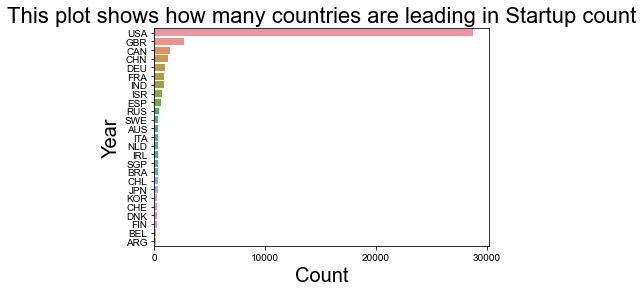

In [18]:
plt.figure()
sns.countplot(data = investment_data, y="country_code", order=investment_data["country_code"].value_counts()[:25].index)
sns.set(rc={'figure.figsize':(25,15)})
plt.ylabel("Year",fontsize=20)
sns.set(font_scale=2)
plt.xlabel("Count",fontsize=20)
plt.title("This plot shows how many countries are leading in Startup count", fontsize=22)
plt.show()

If the above graph is not visible properly then just run that block again. It's some bug 

### We see that 'state_code' is NaN for all the countries except USA and CAN. 
### We cannot do the dropna() as it will eliminate the data of all the countries except USA and CAN
### We cannot filter out the state_code as it is an important feature when it comes to the prediction about Startups in USA and CAN as they both are the in the top 3 major countries which have Startups. Hence, we took the decision of replacing the null values of the state_code of the countries except for USA and CAN with the 'region' in which they were originating from.
### This way we keep important decision criteria and solve the problem of losing all the country's data. 

In [19]:
investment_data['state_code']= np.where(investment_data['state_code'].isnull(), investment_data['region'], investment_data['state_code'])

## We now remove all the null values from the dataset to get clean data. We cannot replace missing data by Mode or Mean as the data is from different countries and in different markets so the model will be biased towards the data which we use to replace.

In [20]:
investment_data = investment_data.dropna()

In [21]:
investment_data

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,Tallinn,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,London,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,|Software|,Software,-,operating,USA,IL,"Springfield, Illinois",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,|E-Commerce|,E-Commerce,"40,000",operating,CHL,Santiago,Santiago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49430,/organization/zyraz-technology,Zyraz Technology,http://www.zyraz.com,|Biotechnology|,Biotechnology,"1,54,19,877",closed,MYS,MYS - Other,MYS - Other,...,0.0,0.0,7991547.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49432,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,|Biotechnology|,Biotechnology,"26,86,600",operating,AUT,Vienna,Vienna,...,0.0,0.0,2686600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49433,/organization/zzish,Zzish,http://www.zzish.com,|Analytics|Gamification|Developer APIs|iOS|And...,Education,"3,20,000",operating,GBR,London,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49435,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,|Web Development|Advertising|Wireless|Mobile|,Web Development,"97,398",operating,HRV,Split,Split,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### We notice that there are some black spaces in the 'market' column values. Hence we strip them to get clean data.

In [22]:
investment_data['market'] = investment_data['market'].str.strip()
investment_data

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,Tallinn,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,London,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,|Software|,Software,-,operating,USA,IL,"Springfield, Illinois",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,|E-Commerce|,E-Commerce,"40,000",operating,CHL,Santiago,Santiago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49430,/organization/zyraz-technology,Zyraz Technology,http://www.zyraz.com,|Biotechnology|,Biotechnology,"1,54,19,877",closed,MYS,MYS - Other,MYS - Other,...,0.0,0.0,7991547.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49432,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,|Biotechnology|,Biotechnology,"26,86,600",operating,AUT,Vienna,Vienna,...,0.0,0.0,2686600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49433,/organization/zzish,Zzish,http://www.zzish.com,|Analytics|Gamification|Developer APIs|iOS|And...,Education,"3,20,000",operating,GBR,London,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49435,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,|Web Development|Advertising|Wireless|Mobile|,Web Development,"97,398",operating,HRV,Split,Split,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<br>
<br>

## Analysing for Mobile based startups

In [23]:
mobile_cond = (investment_data['market'].str.contains("Mobile"))
mobile_data = investment_data[mobile_cond]
mobile_data

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
43,/organization/121cast,121cast,http://www.121cast.com,|Audio|Music|Mobile|,Mobile,"2,70,000",operating,AUS,Melbourne,Melbourne,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53,/organization/13th-lab,13th Lab,http://13thlab.com,|iPad|Games|Augmented Reality|Computer Vision|...,Mobile,"7,00,000",operating,SWE,Stockholm,Stockholm,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,/organization/20-20-mobile,20:20 Mobile,http://www.2020mobile.com,|Mobile|,Mobile,"2,97,50,000",operating,IRL,IRL - Other,IRL - Other,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,/organization/2359-media,2359 Media,http://www.2359media.com,|Mobile|,Mobile,"6,15,000",operating,SGP,Singapore,Singapore,...,0.0,0.0,615000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138,/organization/2can,2can,http://2can.ru,|Credit Cards|Mobile|,Mobile,"70,00,000",operating,RUS,Moscow,Moscow,...,0.0,0.0,2000000.0,5000000.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49360,/organization/zula,Zula,http://www.zulaapp.com,|Mobile|,Mobile,"40,00,000",operating,USA,NY,New York City,...,0.0,0.0,3000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49377,/organization/zumobi,Zumobi,http://www.zumobi.com,|Mobile|,Mobile,"1,20,00,000",operating,USA,WA,Seattle,...,0.0,0.0,12000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49382,/organization/zupcat,ZupCat,http://www.zupcat.com,|Facebook Applications|Mobile|Games|,Mobile,"7,00,000",operating,ARG,Buenos Aires,Buenos Aires,...,0.0,0.0,700000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49405,/organization/zwipe,Zwipe,http://zwipe.com,|Mobile|,Mobile,"35,00,000",operating,NOR,Oslo,Oslo,...,0.0,0.0,3500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


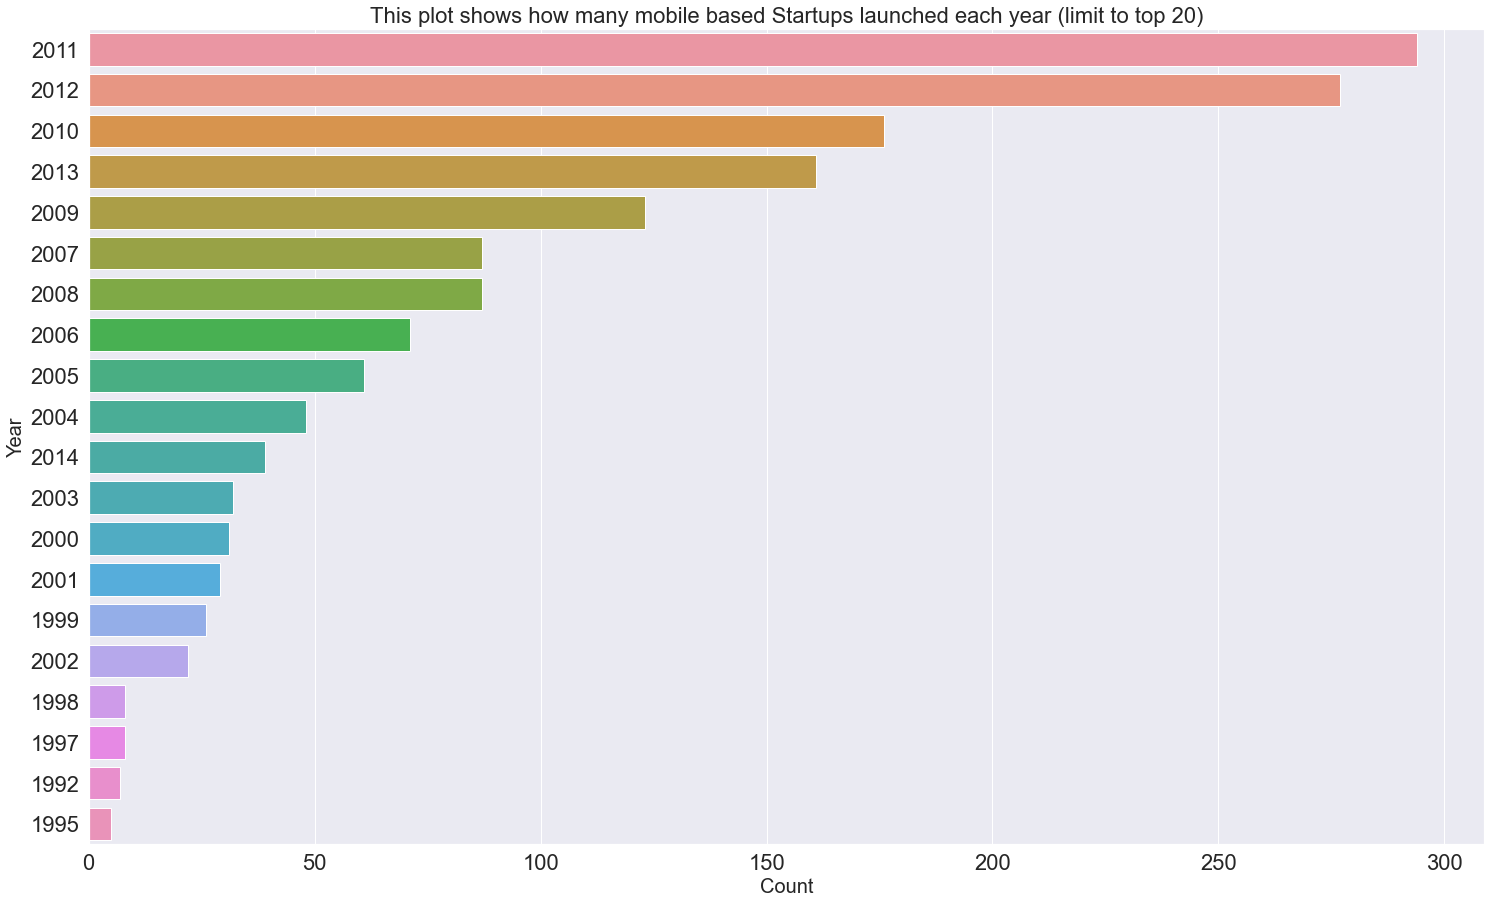

In [24]:
sns.countplot(data = mobile_data, y='founded_year',order=mobile_data["founded_year"].astype(int).value_counts()[:20].index)
sns.set(rc={'figure.figsize':(25,15)})
plt.ylabel("Year",fontsize=20)
sns.set(font_scale=3)
plt.xlabel("Count",fontsize=20)
plt.title("This plot shows how many mobile based Startups launched each year (limit to top 20)", fontsize=22)
plt.show()

## We notice that a considerable amount of Mobile based apps are developed post the year 2007. Here are the reasons:
### 1. Apple launched the iPhone in the year 2007 which became a trademark in the "First Fully functioning Touch-screen phone termed SMARTPHONE" 
### 2. Android OS was released in 2008. 
### 3. Samsung started the series of phones named "Galaxy" in the year 2009.
## Due to these reasons the Mobile-based startups grew in count as people started using the various Applications in their Smartphones

<br>
<br>

# Analysing for the Market targets:

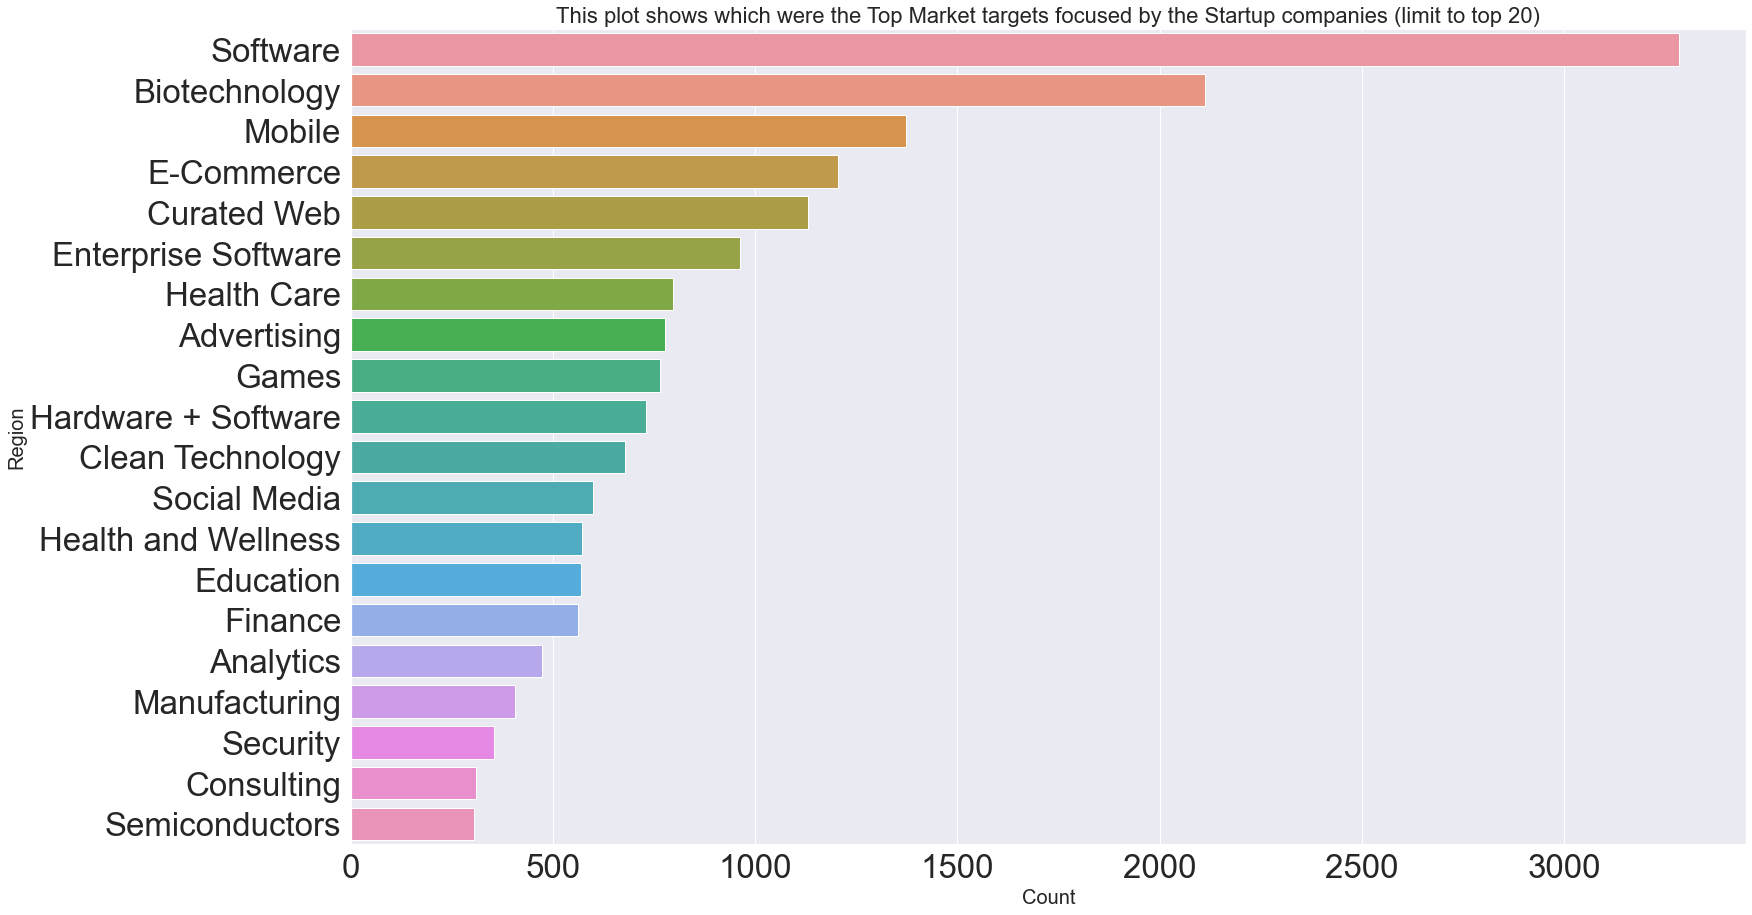

In [25]:
sns.countplot(data = investment_data,y="market",order=investment_data["market"].value_counts()[:20].index)
sns.set(rc={'figure.figsize':(25,15)})
plt.ylabel("Region",fontsize=20)
sns.set(font_scale=3)
plt.xlabel("Count",fontsize=20)
plt.title("This plot shows which were the Top Market targets focused by the Startup companies (limit to top 20)", fontsize=22)
plt.show()

## We see a that after Software, Biotechnology is the top 2 startup market area. Upon quick research we found out that:
### In 2011, the International Energy Agency said that "the development of affordable, inexhaustible and clean solar energy technologies will have huge longer-term benefits. It will increase countries' energy security through reliance on an indigenous, inexhaustible, and mostly import-independent resource, enhance sustainability, reduce pollution, lower the costs of mitigating global warming, and keep fossil fuel prices lower than otherwise. These advantages are global. Hence the additional costs of the incentives for early deployment should be considered learning investments; they must be wisely spent and need to be widely shared" 
### Hence post 2011, people started making the use of renewable resources like Solar and worked on inovations in this sector.
#### [wikipedia]

<br>

# Analysing for the Founding Years:

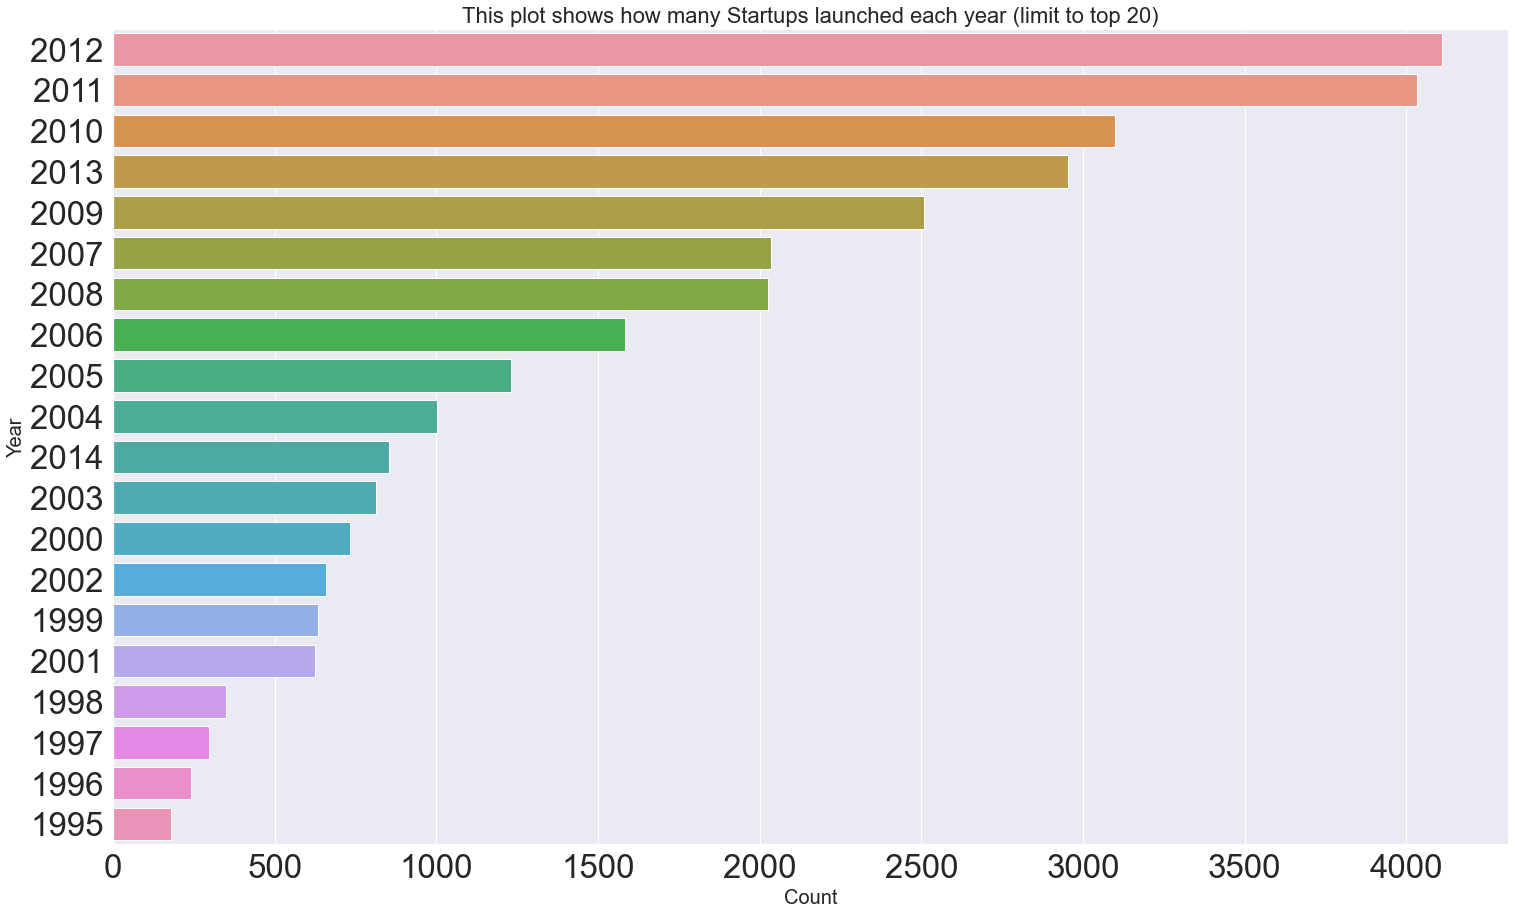

In [26]:
sns.countplot(data=investment_data,y="founded_year", order=investment_data["founded_year"].astype(int).value_counts()[:20].index)
sns.set(rc={'figure.figsize':(25,15)})
plt.ylabel("Year",fontsize=20)
sns.set(font_scale=3)
plt.xlabel("Count",fontsize=20)
plt.title("This plot shows how many Startups launched each year (limit to top 20)", fontsize=22)
plt.show()

# We did some research about why 2011 and 2012 were the years when most of the startups were launched. Here are the major reasons:
## Google made a couple of breakthroughs in 2011 by going social and launching G+ and Chrome browser. This helped many small companies to gain some traction and get access to data conveniently which motivated them to reach a peak.
## Less competition, a cheaper market in general, saving on costs and easy funding (debt financing) due to the 2008 recession helped many small companies launch a StartUp
## Due to job scarcity post-2008 the people opted of being entrepreneurs and started coming up with different ideas for Startups 

<br>

# Analysing for the Regions:

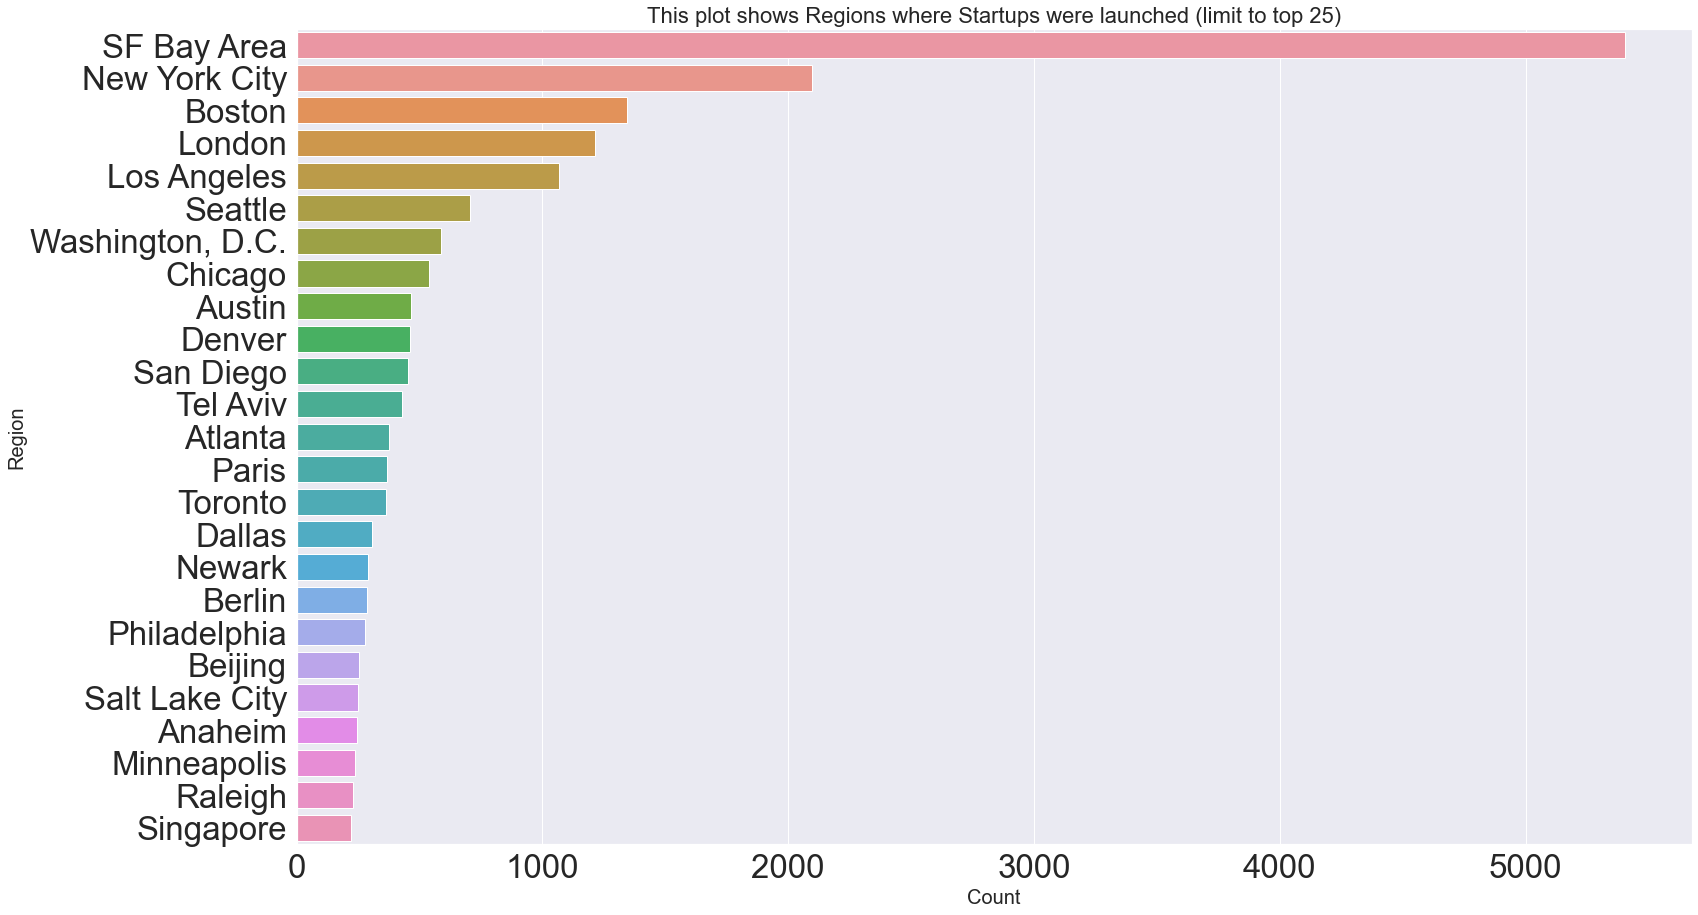

In [27]:
sns.countplot(data = investment_data,y="region",order=investment_data["region"].value_counts()[:25].index)
sns.set(rc={'figure.figsize':(29,15)})
plt.ylabel("Region",fontsize=20)
sns.set(font_scale=3)
plt.xlabel("Count",fontsize=20)
plt.title("This plot shows Regions where Startups were launched (limit to top 25)", fontsize=22)
plt.show()

## As we can see that most of the Startups are in the feild of Softare and BioTech, SF Bay area is the place where max Startups are launched each year as it is the Silicon Valley

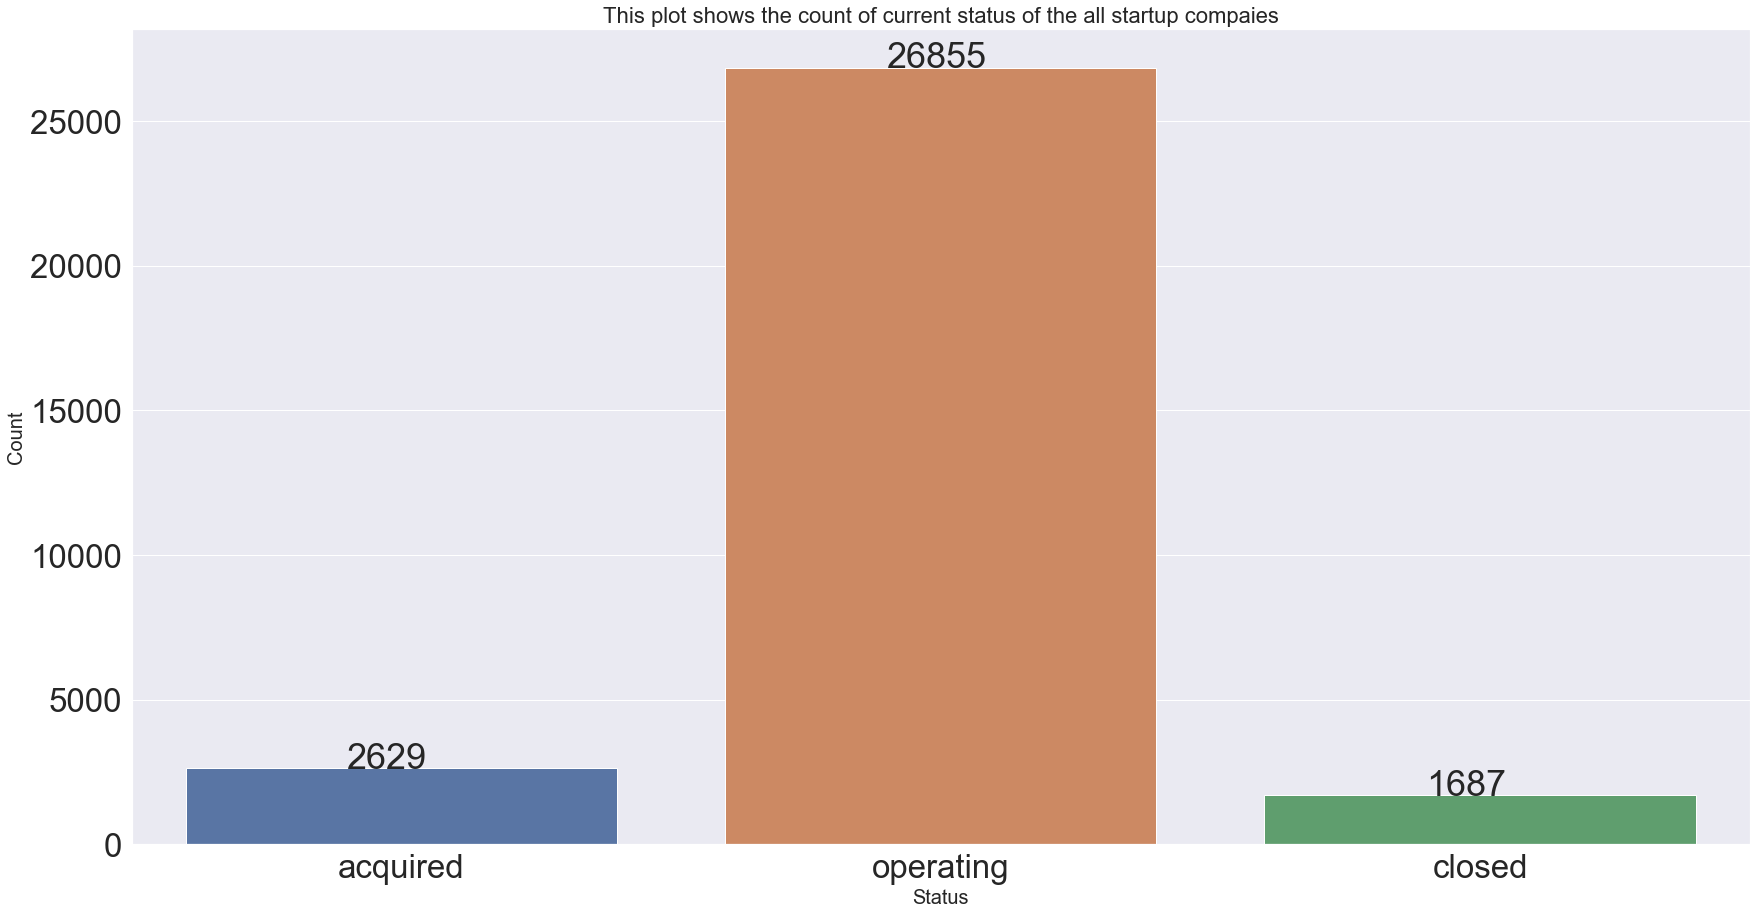

In [28]:
ax = sns.countplot(data = investment_data , x = "status")
sns.set(rc={'figure.figsize':(25,15)})
plt.ylabel("Count",fontsize=20)
sns.set(font_scale=3)
plt.xlabel("Status",fontsize=20)
plt.title("This plot shows the count of current status of the all startup compaies", fontsize=22)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+1))
plt.show()

# After studying about each and every term of the data columns (equity, debt financing) we figured out which features are important when it is related to a StartUp and filtered out the data which is not so important for now.  

In [29]:
filtered_data = investment_data.drop(['permalink','name','homepage_url',
           'category_list','region',
           'city','funding_rounds','founded_month',
           'founded_at','founded_quarter',
           'first_funding_at','last_funding_at',
           'venture','equity_crowdfunding',
           'undisclosed','convertible_note',
           'private_equity',
           'post_ipo_equity','post_ipo_debt',
           'secondary_market'], axis=1)

###  We remove the ',' and replace the '-' by 0 to clean the 'funding_total_usd' data.

In [30]:
filtered_data['funding_total_usd'] = filtered_data['funding_total_usd'].str.replace(',', '')
filtered_data['funding_total_usd'] = filtered_data['funding_total_usd'].str.replace('-', '0')
filtered_data['funding_total_usd'] = filtered_data['funding_total_usd'].astype(float)

In [31]:
len(filtered_data)

31171

In [32]:
filtered_data.head()

,market,funding_total_usd,status,country_code,state_code,founded_year,seed,debt_financing,angel,grant,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,News,1750000.0,acquired,USA,NY,2012.0,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Publishing,40000.0,operating,EST,Tallinn,2012.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Electronics,1500000.0,operating,GBR,London,2011.0,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Software,0.0,operating,USA,IL,2010.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,E-Commerce,40000.0,operating,CHL,Santiago,2012.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
filtered_data.shape

(31171, 19)

# We finally have clean data that we can supply to the Machine Learning Algorithms and now we proceed to implement the classification and prediction.

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [35]:
le = LabelEncoder()
filtered_data['market'] = le.fit_transform(filtered_data['market'].astype(str))
filtered_data['status'] = le.fit_transform(filtered_data['status'].astype(str))
filtered_data['country_code'] = le.fit_transform(filtered_data['country_code'].astype(str))
filtered_data['state_code'] = le.fit_transform(filtered_data['state_code'].astype(str))

In [36]:
filtered_data

,market,funding_total_usd,status,country_code,state_code,founded_year,seed,debt_financing,angel,grant,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,440,1750000.0,0,101,453,2012.0,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,517,40000.0,2,32,621,2012.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,201,1500000.0,2,35,370,2011.0,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,603,0.0,2,101,279,2010.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,190,40000.0,2,18,565,2012.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49430,55,15419877.0,1,68,397,1994.0,0.0,0.0,2007363.0,5400000.0,0.0,7991547.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49432,55,2686600.0,2,5,665,2007.0,0.0,0.0,0.0,0.0,0.0,2686600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49433,195,320000.0,2,35,370,2013.0,320000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49435,696,97398.0,2,41,588,2012.0,71525.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
filtered_data = filtered_data.reset_index().drop(['index'], axis=1)

In [38]:
filtered_data

,market,funding_total_usd,status,country_code,state_code,founded_year,seed,debt_financing,angel,grant,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,440,1750000.0,0,101,453,2012.0,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,517,40000.0,2,32,621,2012.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,201,1500000.0,2,35,370,2011.0,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,603,0.0,2,101,279,2010.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,190,40000.0,2,18,565,2012.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31166,55,15419877.0,1,68,397,1994.0,0.0,0.0,2007363.0,5400000.0,0.0,7991547.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31167,55,2686600.0,2,5,665,2007.0,0.0,0.0,0.0,0.0,0.0,2686600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31168,195,320000.0,2,35,370,2013.0,320000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31169,696,97398.0,2,41,588,2012.0,71525.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
filtered_data.columns

Index(['market', 'funding_total_usd', 'status', 'country_code', 'state_code',
       'founded_year', 'seed', 'debt_financing', 'angel', 'grant',
       'product_crowdfunding', 'round_A', 'round_B', 'round_C', 'round_D',
       'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

<br>

# Preparing the data

# Train Test Split

In [40]:
features = ['market', 'funding_total_usd', 'country_code', 'state_code',
       'founded_year', 'seed', 'angel', 'grant', 'product_crowdfunding',
       'round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F',
       'round_G','debt_financing']
X = filtered_data[features]
y = filtered_data['status']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [42]:
X_train

,market,funding_total_usd,country_code,state_code,founded_year,seed,angel,grant,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,debt_financing
3660,313,1700000.0,101,100,2010.0,0.0,1700000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19747,603,12400000.0,101,669,1999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3183,603,44700000.0,101,100,2010.0,1500000.0,0.0,0.0,0.0,12300000.0,30900000.0,0.0,0.0,0.0,0.0,0.0,0.0
30965,92,0.0,101,100,2012.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25946,605,486600000.0,101,100,2007.0,0.0,0.0,1600000.0,0.0,12000000.0,18000000.0,55000000.0,60000000.0,0.0,0.0,0.0,190000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,201,52500000.0,101,394,1987.0,0.0,0.0,0.0,0.0,0.0,4000000.0,30000000.0,0.0,0.0,0.0,0.0,0.0
19648,115,663553.0,101,105,2011.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9845,190,19710000.0,101,384,2012.0,590000.0,0.0,0.0,0.0,19100000.0,0.0,0.0,0.0,0.0,0.0,0.0,20000.0
10799,487,40000.0,101,453,2012.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<br>

# Applying Machine Learning Models for Predictions

# Using Support Vector Classifier

In [43]:
svm_model_gaussian = SVC(random_state=0,kernel='rbf', C=1).fit(X_train, y_train)
svm_predictions = svm_model_gaussian.predict(X_test)

In [44]:
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_accuracy

0.85767750213858

In [45]:
y_test = list(y_test)

In [46]:
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)
svm_confusion_matrix

array([[   0,    0,  824],
       [   0,    0,  507],
       [   0,    0, 8021]], dtype=int64)

In [47]:
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       824
           1       0.00      0.00      0.00       507
           2       0.86      1.00      0.92      8021

    accuracy                           0.86      9352
   macro avg       0.29      0.33      0.31      9352
weighted avg       0.74      0.86      0.79      9352



# Using Decision Tree Classifier

In [48]:
dt_model = DecisionTreeClassifier(random_state=0)
dt_model = dt_model.fit(X_train,y_train)
dt_predictions = dt_model.predict(X_test)

In [49]:
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_accuracy

0.7625106928999145

In [50]:
dt_confusion_matrix = confusion_matrix(y_test, dt_predictions)
dt_confusion_matrix

array([[ 161,   85,  578],
       [  49,   74,  384],
       [ 687,  438, 6896]], dtype=int64)

In [51]:
print(classification_report(y_test, dt_predictions))

              precision    recall  f1-score   support

           0       0.18      0.20      0.19       824
           1       0.12      0.15      0.13       507
           2       0.88      0.86      0.87      8021

    accuracy                           0.76      9352
   macro avg       0.39      0.40      0.40      9352
weighted avg       0.78      0.76      0.77      9352



# Using Random Forest Classifier

In [52]:
rf_model = RandomForestClassifier(random_state=0,n_estimators=100)
rf_model = rf_model.fit(X_train,y_train)
rf_predictions = rf_model.predict(X_test)

In [53]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_accuracy

0.8467707442258341

In [54]:
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)
rf_confusion_matrix

array([[  41,    8,  775],
       [   9,    5,  493],
       [ 103,   45, 7873]], dtype=int64)

In [55]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.27      0.05      0.08       824
           1       0.09      0.01      0.02       507
           2       0.86      0.98      0.92      8021

    accuracy                           0.85      9352
   macro avg       0.41      0.35      0.34      9352
weighted avg       0.77      0.85      0.80      9352



# Using KNN Classifier

In [56]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn = knn_model.fit(X_train,y_train)
knn_predictions = knn_model.predict(X_test)

In [57]:
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_accuracy

0.8187553464499572

In [58]:
knn_confusion_matrix = confusion_matrix(y_test, knn_predictions)
knn_confusion_matrix

array([[  84,   12,  728],
       [  25,   12,  470],
       [ 361,   99, 7561]], dtype=int64)

In [59]:
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.18      0.10      0.13       824
           1       0.10      0.02      0.04       507
           2       0.86      0.94      0.90      8021

    accuracy                           0.82      9352
   macro avg       0.38      0.36      0.36      9352
weighted avg       0.76      0.82      0.79      9352



# Using Multiple Linear Regression

In [60]:
mlr_model = LinearRegression()  
mlr_model.fit(X_train, y_train)

LinearRegression()

In [61]:
mlr_predictions = mlr_model.predict(X_test)

In [62]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, mlr_predictions))  
print('Accuracy: ', (1-metrics.mean_absolute_error(y_test, mlr_predictions)))

Mean Absolute Error: 0.37877013698066475
Accuracy:  0.6212298630193352


# Comparing Models

In [63]:
accuracies = {'KNN' : knn_accuracy * 100,
             'SCV' : svm_accuracy * 100,
              'Decision Tree' : dt_accuracy * 100,
             'Random Forest' : rf_accuracy * 100,
             'Multi-Linear Reg' : ((1-metrics.mean_absolute_error(y_test, mlr_predictions))*100)}

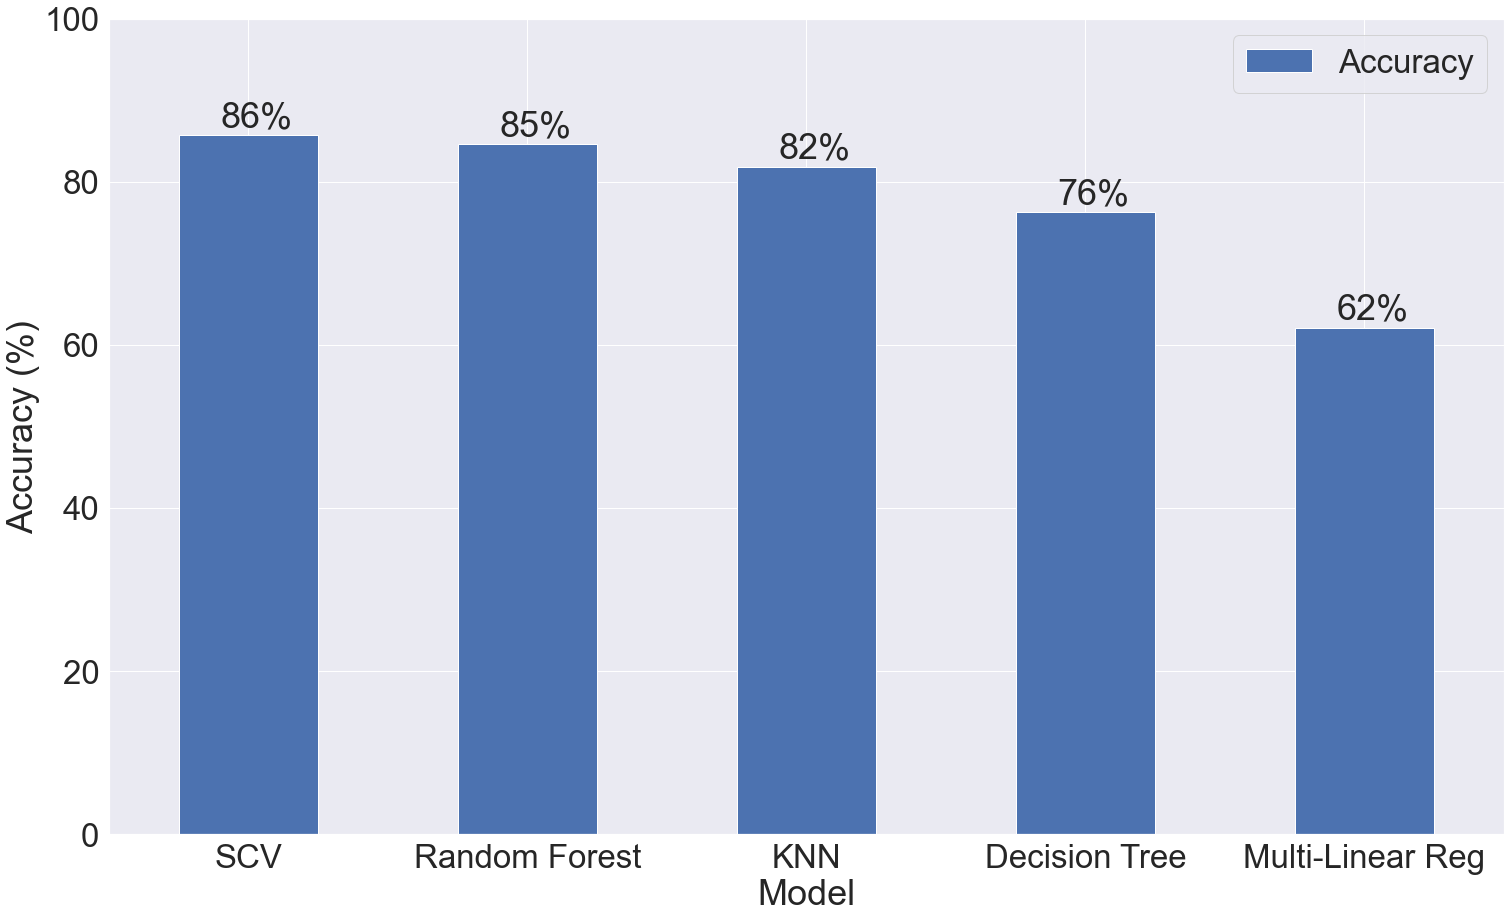

In [64]:
comparision = pd.DataFrame.from_dict(accuracies, orient='index')
comparision = comparision.rename(columns={0:'Accuracy'})
comparision = comparision.sort_values(by=['Accuracy'], ascending=False)
ax = comparision.plot(kind='bar', ylim=(0,100))
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate('{:.0f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.xlabel("Model")
plt.show()

### Here we can see that Support Vector Classifier algroithm shows the maximum accuracy amongst the 5 models used in the project. This can be largely recognized by the feature of the SVCs containing the 'kernels' which can be fine tuned to get closer to the desired output.